<a href="https://colab.research.google.com/github/Ebabz-png/Complex-Network/blob/main/TAMA_FINAL_PROJECT_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx
!pip install cartopy
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 116.5 MB/s eta 0:00:00


In [ ]:
import os
import folium
import numpy as np
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import shapely

from branca.element import Figure

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import geopandas as gpd

gdf = gpd.read_file('/content/gdrive/MyDrive/TAMA FIles/Bacia_Tamanduatei.shp')
gdf.head()

,id,Descricao,Area_m2,Area_km2,Perim_m,Perim_km,geometry
0,1,Rio Tamanduateí,336739513.2,336.74,110470.2,110.47,"POLYGON ((346908.201 7387473.448, 346929.368 7..."


In [ ]:
import geopandas as gpd

gdf = gpd.read_file('/content/gdrive/MyDrive/TAMA FIles/2018_a_04-2025_TTI_EDITADO.shp')
gdf.head()

,DATA,LOCAL,REF,SENTIDO,INICIO,TERMINO,CONDICAO,SUB,LONG,LAT,Rotulacao,geometry
0,27/06/2020,AV. PAULISTA,AL. MIN. ROCHA AZEVEDO,CONSOLACAO/PARAISO,06:29:00.000,14:19,Transitável,SE,-46.658087,-23.560115,Alagamento,POINT (330769.725 7393494.511)
1,04/02/2022,R BELA CINTRA,R PEDRO TAQUES,UNICO,11:44:00.000,11:47,Intransitável,SE,-46.656456,-23.552890,Alagamento,POINT (330926.994 7394296.54)
2,04/02/2022,R DONA ANTONIA DE QUEIROS,R COSTA,UNICO,11:34:00.000,11:34,Intransitável,SE,-46.653197,-23.550770,Alagamento,POINT (331256.969 7394535.12)
3,26/02/2018,AV. NOVE DE JULHO,"PQ ANHANGABAU, 0",CENTRO/BAIRRO,15:50:00.000,16:02,Transitável,SE,-46.653017,-23.557545,Alagamento,POINT (331284.004 7393785.09)
4,04/01/2023,R DONA ANTONIA DE QUEIROZ,R FREI CANECA,CENTRO/BAIRRO,16:50:00.000,20:00,Transitável,SE,-46.652078,-23.553120,Alagamento,POINT (331374.213 7394276.216)


In [ ]:
import geopandas as gpd

gdf = gpd.read_file('/content/gdrive/MyDrive/TAMA FIles/2018-2024_SantoAndre_TTI.shp')
gdf.head()

,ID,DSC_SERVIC,ANO_OCORRE,DATA_OCORR,HORA_OCORR,layer,geometry
0,34108.0,809.4 DDC - Enchente / Inundacao / Alagamento ...,2018,2018-01-23,18:54:00,2018,POINT (347882.501 7386443.915)
1,37416.0,809.1 DDC - Enchente / Inundacao / Alagamento ...,2018,2018-01-23,19:26:00,2018,POINT (343039.44 7386716.16)
2,33884.0,809.2 DDC - Enchente / Inundacao / Alagamento ...,2018,2018-01-23,16:22:00,2018,POINT (347420.22 7386087.853)
3,34199.0,809.4 DDC - Enchente / Inundacao / Alagamento ...,2018,2018-01-23,17:18:00,2018,POINT (347622.235 7386391.938)
4,34063.0,809.2 DDC - Enchente / Inundacao / Alagamento ...,2018,2018-03-03,11:31:00,2018,POINT (345872.055 7381944.915)


In [ ]:
import geopandas as gpd

gdf = gpd.read_file('/content/gdrive/MyDrive/TAMA FIles/Tamanduatei_Network.shp')
gdf.head()

,OBJECTID,arcid,grid_code,from_node,to_node,Shape_Leng,geometry
0,1,1,8,1,2,3.535534,"LINESTRING (332314.5 7398118.5, 332312 7398116)"
1,2,2,16,3,1,20.000000,"LINESTRING (332334.5 7398118.5, 332314.5 73981..."
2,3,3,32,4,3,14.142136,"LINESTRING (332344.5 7398108.5, 332334.5 73981..."
3,4,4,16,5,4,10.000000,"LINESTRING (332354.5 7398108.5, 332344.5 73981..."
4,5,5,32,6,5,7.071068,"LINESTRING (332359.5 7398103.5, 332354.5 73981..."


In [ ]:
rivers_shp = gpd.read_file("/content/gdrive/MyDrive/TAMA FIles/Tamanduatei_Network.shp")

In [ ]:
import geopandas as gpd

# Define gdf using Tamanduatei_Network.shp
gdf = gpd.read_file("/content/gdrive/MyDrive/TAMA FIles/Tamanduatei_Network.shp")

print("gdf successfully redefined with Tamanduatei_Network.shp")
print(gdf.head())

gdf successfully redefined with Tamanduatei_Network.shp
   OBJECTID  arcid  grid_code  from_node  to_node  Shape_Leng  \
0         1      1          8          1        2    3.535534   
1         2      2         16          3        1   20.000000   
2         3      3         32          4        3   14.142136   
3         4      4         16          5        4   10.000000   
4         5      5         32          6        5    7.071068   

                                            geometry  
0    LINESTRING (332314.5 7398118.5, 332312 7398116)  
1  LINESTRING (332334.5 7398118.5, 332314.5 73981...  
2  LINESTRING (332344.5 7398108.5, 332334.5 73981...  
3  LINESTRING (332354.5 7398108.5, 332344.5 73981...  
4  LINESTRING (332359.5 7398103.5, 332354.5 73981...  


In [ ]:
rivers_shp_cut = rivers_shp.to_crs("EPSG:4326")

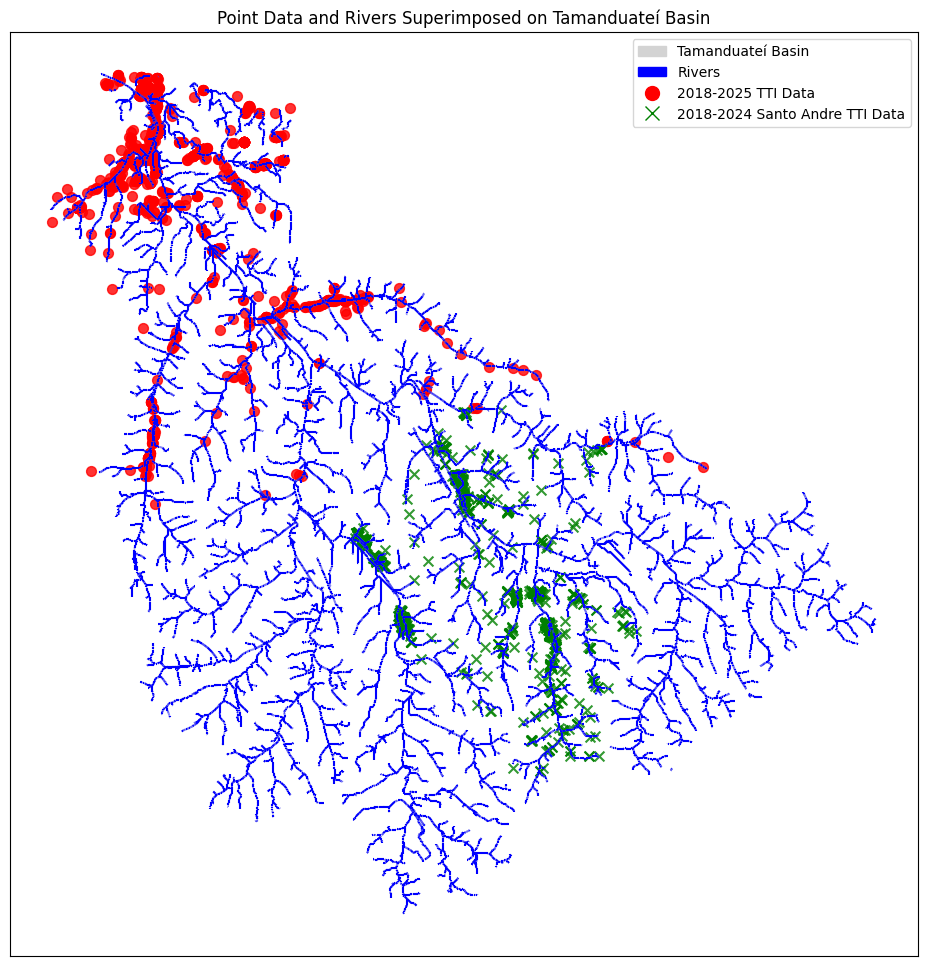

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the first point shapefile from Google Drive
points_shp_file1 = "/content/gdrive/MyDrive/TAMA FIles/2018_a_04-2025_TTI_EDITADO.shp"
points_gdf1 = gpd.read_file(points_shp_file1)

# Load the second point shapefile from Google Drive
points_shp_file2 = "/content/gdrive/MyDrive/TAMA FIles/2018-2024_SantoAndre_TTI.shp"
points_gdf2 = gpd.read_file(points_shp_file2)

# Ensure all GeoDataFrames have the same CRS as the basin gdf
if gdf.crs != points_gdf1.crs:
    points_gdf1 = points_gdf1.to_crs(gdf.crs)

if gdf.crs != points_gdf2.crs:
    points_gdf2 = points_gdf2.to_crs(gdf.crs)

# Reproject rivers_shp_cut to the same CRS as gdf if necessary
if gdf.crs != rivers_shp_cut.crs:
    rivers_shp_cut = rivers_shp_cut.to_crs(gdf.crs)

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the basin
gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7)

# Plot the rivers
rivers_shp_cut.plot(ax=ax, color='blue', linewidth=1.5)

# Plot the first set of points
points_gdf1.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.8)

# Plot the second set of points
points_gdf2.plot(ax=ax, marker='x', color='green', markersize=50, alpha=0.8)

# Create custom legend handles
basin_patch = mpatches.Patch(color='lightgray', label='Tamanduateí Basin')
rivers_patch = mpatches.Patch(color='blue', label='Rivers')
points1_handle = plt.Line2D([], [], linestyle='None', marker='o', color='red', markersize=10, label='2018-2025 TTI Data')
points2_handle = plt.Line2D([], [], linestyle='None', marker='x', color='green', markersize=10, label='2018-2024 Santo Andre TTI Data')

# Set title and legend using custom handles
ax.set_title('Point Data and Rivers Superimposed on Tamanduateí Basin')
ax.legend(handles=[basin_patch, rivers_patch, points1_handle, points2_handle])

# Remove axis ticks and labels for a cleaner map
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

MultiDiGraph with 1731 nodes and 3139 edges


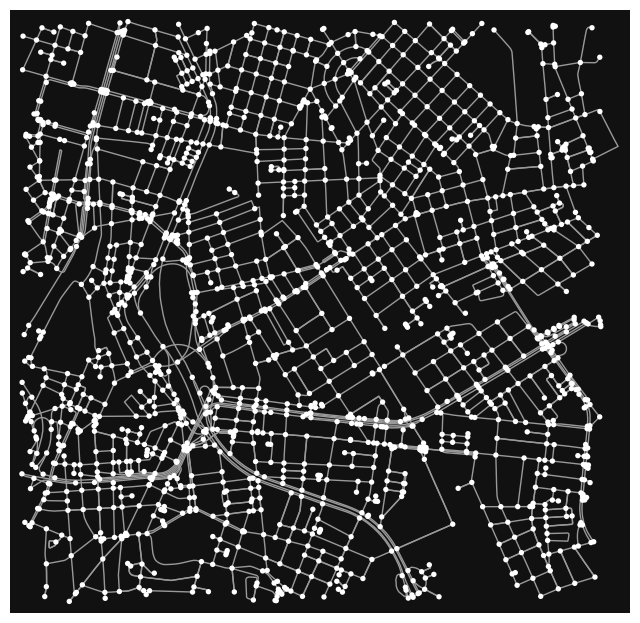

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G_point = ox.graph_from_point([-23.546034, -46.618587],
                              dist = 2000, network_type='drive')
print(G_point)
fig = ox.plot_graph(G_point)
fig

In [ ]:
import networkx as nx

# Calculate betweenness centrality for the graph G_point
betweenness_centrality = nx.betweenness_centrality(G_point, weight='length')

# Add betweenness centrality as a node attribute to G_point
nx.set_node_attributes(G_point, betweenness_centrality, 'betweenness')

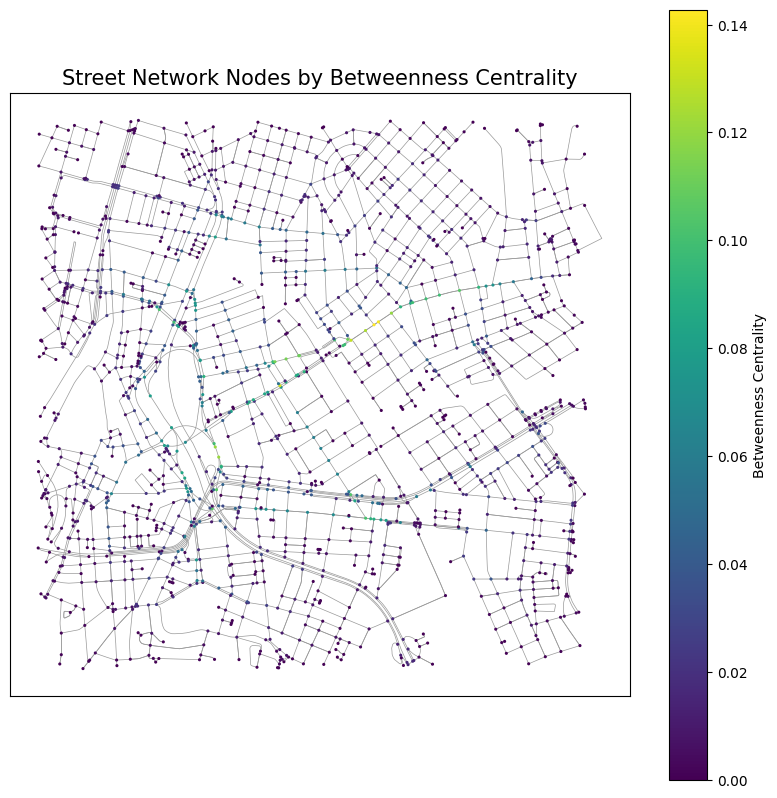

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# Extract nodes and edges as GeoDataFrames from G_point
nodes_p, edges_p = ox.graph_to_gdfs(G_point)

# Get betweenness centrality values for nodes
betweenness_values = [nodes_p.loc[node]['betweenness'] for node in nodes_p.index]

# Normalize betweenness centrality values for node coloring
if max(betweenness_values) == min(betweenness_values):
    norm = colors.NoNorm()
else:
    norm = colors.Normalize(vmin=min(betweenness_values), vmax=max(betweenness_values))

# Choose a colormap
cmap = cm.viridis

# Map normalized values to colors using the colormap for nodes
node_colors = [cmap(norm(value)) for value in betweenness_values]

# Set node sizes to a small constant value for dots
node_sizes = 5 # Small constant value for dots

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the edges (street network)
edges_p.plot(ax=ax, linewidth=0.5, color='#999999') # Plot edges in a neutral color

# Plot the nodes, colored and sized by betweenness centrality
nodes_p.plot(ax=ax, marker='o', markersize=node_sizes, color=node_colors, edgecolor='none', zorder=2)

# Add a colorbar to indicate centrality values
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(betweenness_values)
cb = plt.colorbar(sm, ax=ax, label='Betweenness Centrality')

ax.set_title('Street Network Nodes by Betweenness Centrality', fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

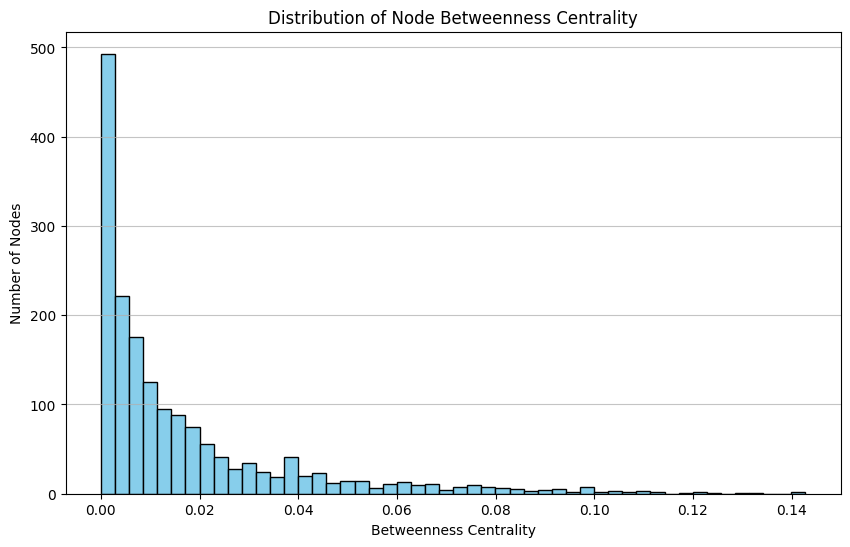

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(betweenness_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Node Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
from shapely.geometry import Point

# Define central coordinates
central_lat = -23.546034
central_lon = -46.618587

# Create a shapely Point object
center_point = Point(central_lon, central_lat)

center_gdf = gpd.GeoDataFrame([1], geometry=[center_point], crs='EPSG:4326')

center_gdf_projected = center_gdf.to_crs(epsg=3857)

print(center_gdf_projected.head())

   0                           geometry
0  1  POINT (-5189557.366 -2698187.141)


In [ ]:
buffer_2000m_projected = center_gdf_projected.geometry.buffer(5000)

buffer_gdf_4326 = gpd.GeoDataFrame(geometry=buffer_2000m_projected, crs='EPSG:3857').to_crs(epsg=4326)

print(buffer_gdf_4326.head())

                                            geometry
0  POLYGON ((-46.57367 -23.54603, -46.57389 -23.5...


In [ ]:
if points_gdf1.crs != buffer_gdf_4326.crs:
    points_gdf1_reprojected = points_gdf1.to_crs(buffer_gdf_4326.crs)
else:
    points_gdf1_reprojected = points_gdf1

clipped_points_gdf1 = gpd.clip(points_gdf1_reprojected, buffer_gdf_4326)

print(f"Number of points in points_gdf1 before clipping: {len(points_gdf1)}")
print(f"Number of points in points_gdf1 after clipping: {len(clipped_points_gdf1)}")
print(clipped_points_gdf1.head())

Number of points in points_gdf1 before clipping: 1440
Number of points in points_gdf1 after clipping: 1153
           DATA                      LOCAL                    REF SENTIDO  \
462  10/01/2021  R. PEDRA AZUL (LIBERDADE)                R XIMBO   ÚNICA   
470  20/01/2022           R TEIXEIRA LEITE      R BARÃO DE IGUAPE   AMBOS   
465  10/01/2023           R TEIXEIRA LEITE              R S PAULO   UNICO   
466  07/02/2023           R TEIXEIRA LEITE  R S PAULO (LIBERDADE)   AMBOS   
493  26/04/2019                 R. S PAULO       R TEIXEIRA LEITE   AMBOS   

           INICIO TERMINO       CONDICAO SUB       LONG        LAT  \
462  14:36:00.000   15:50  Intransitável  SE -46.628959 -23.578741   
470  17:50:00.000   18:30  Intransitável  SE -46.628864 -23.557845   
465  16:13:00.000   18:28    Transitável  SE -46.628610 -23.557309   
466  14:57:00.000   17:09  Intransitável  SE -46.628610 -23.557309   
493  16:11:00.000   16:34    Transitável  SE -46.628560 -23.557195   

      Rot

/tmp/ipython-input-3950841262.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


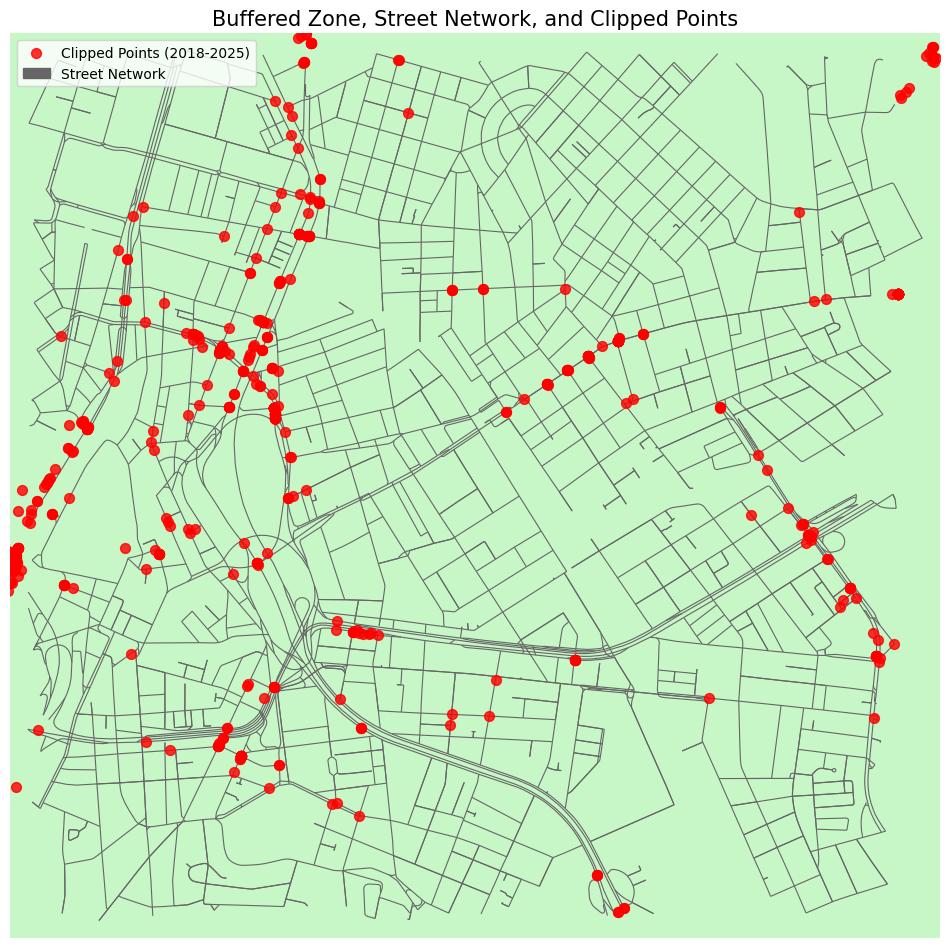

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the buffered zone
buffer_gdf_4326.plot(ax=ax, color='lightgreen', edgecolor='green', alpha=0.5, label='Buffered Zone (5km)')

# Plot the street network
ox.plot_graph(G_point, ax=ax, show=False, close=False, edge_color='#666666', edge_linewidth=0.8, node_size=0, bgcolor='none')

# Create a legend handle for the street network
network_patch = mpatches.Patch(color='#666666', label='Street Network')

# Plot the clipped points
clipped_points_gdf1.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.8, label='Clipped Points (2018-2025)')

# Set title and legend
ax.set_title('Buffered Zone, Street Network, and Clipped Points', fontsize=15)

# Combine existing handles with the custom network patch
handles, labels = ax.get_legend_handles_labels()
handles.append(network_patch)
labels.append('Street Network')
ax.legend(handles=handles)

# Remove axis ticks and labels for a cleaner map
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

In [ ]:
import random
import networkx as nx
import osmnx as ox

# Identify nodes near flood points
flood_nodes = []
for pt in clipped_points_gdf1.geometry:
    nearest_node = ox.distance.nearest_nodes(G_point, X=pt.x, Y=pt.y)
    flood_nodes.append(nearest_node)

print(f"Number of flood-affected nodes identified: {len(flood_nodes)}")
print(f"Number of random nodes identified: {len(random_nodes)}")

Number of flood-affected nodes identified: 1153
Number of random nodes identified: 1153


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Define central coordinates (re-using variables from earlier cells)
# central_lat = -23.546034
# central_lon = -46.618587
# center_point = Point(central_lon, central_lat)
# center_gdf = gpd.GeoDataFrame([1], geometry=[center_point], crs='EPSG:4326')
# center_gdf_projected = center_gdf.to_crs(epsg=3857)

# Create a 2000m buffer around the central point
buffer_2000m_projected = center_gdf_projected.geometry.buffer(2000)
buffer_gdf_2000m_4326 = gpd.GeoDataFrame(geometry=buffer_2000m_projected, crs='EPSG:3857').to_crs(epsg=4326)

print("2000m buffer created and reprojected to EPSG:4326.")
print(buffer_gdf_2000m_4326.head())

2000m buffer created and reprojected to EPSG:4326.
                                            geometry
0  POLYGON ((-46.60062 -23.54603, -46.60071 -23.5...


In [ ]:
import geopandas as gpd

# points_gdf1 is loaded from '/content/gdrive/MyDrive/TAMA FIles/2018_a_04-2025_TTI_EDITADO.shp'

# Ensure points_gdf1 has the same CRS as the 2000m buffer for clipping
# Assuming points_gdf1 is already in EPSG:4326 or will be reprojected if necessary
if points_gdf1.crs != buffer_gdf_2000m_4326.crs:
    points_gdf1_reprojected_for_2000m = points_gdf1.to_crs(buffer_gdf_2000m_4326.crs)
else:
    points_gdf1_reprojected_for_2000m = points_gdf1

clipped_points_gdf1_2000m = gpd.clip(points_gdf1_reprojected_for_2000m, buffer_gdf_2000m_4326)

print(f"Number of flood points from 2018-2025 data before 2000m clipping: {len(points_gdf1)}")
print(f"Number of flood points from 2018-2025 data after 2000m clipping: {len(clipped_points_gdf1_2000m)}")
print(clipped_points_gdf1_2000m.head())

Number of flood points from 2018-2025 data before 2000m clipping: 1440
Number of flood points from 2018-2025 data after 2000m clipping: 445
           DATA             LOCAL                    REF SENTIDO  \
470  20/01/2022  R TEIXEIRA LEITE      R BARÃO DE IGUAPE   AMBOS   
465  10/01/2023  R TEIXEIRA LEITE              R S PAULO   UNICO   
466  07/02/2023  R TEIXEIRA LEITE  R S PAULO (LIBERDADE)   AMBOS   
493  26/04/2019        R. S PAULO       R TEIXEIRA LEITE   AMBOS   
467  10/03/2023         R S PAULO       R TEIXEIRA LEITE   UNICO   

           INICIO TERMINO       CONDICAO SUB       LONG        LAT  \
470  17:50:00.000   18:30  Intransitável  SE -46.628864 -23.557845   
465  16:13:00.000   18:28    Transitável  SE -46.628610 -23.557309   
466  14:57:00.000   17:09  Intransitável  SE -46.628610 -23.557309   
493  16:11:00.000   16:34    Transitável  SE -46.628560 -23.557195   
467  15:24:00.000   16:13  Intransitável  SE -46.628560 -23.557195   

      Rotulacao               

In [ ]:
import osmnx as ox

# Identify nodes near flood points within the 2000m buffer
flood_nodes_2000m_buffer = []
for pt in clipped_points_gdf1_2000m.geometry:
    # Find the nearest node in the street network G_point
    # G_point was created with a dist=2000, so it represents the network within this buffer
    nearest_node = ox.distance.nearest_nodes(G_point, X=pt.x, Y=pt.y)
    # Check if a nearest node was found and is actually in the graph
    if nearest_node is not None and nearest_node in G_point.nodes:
        flood_nodes_2000m_buffer.append(nearest_node)

print(f"Number of flood-affected nodes identified within the 2000m buffer: {len(flood_nodes_2000m_buffer)}")

Number of flood-affected nodes identified within the 2000m buffer: 445


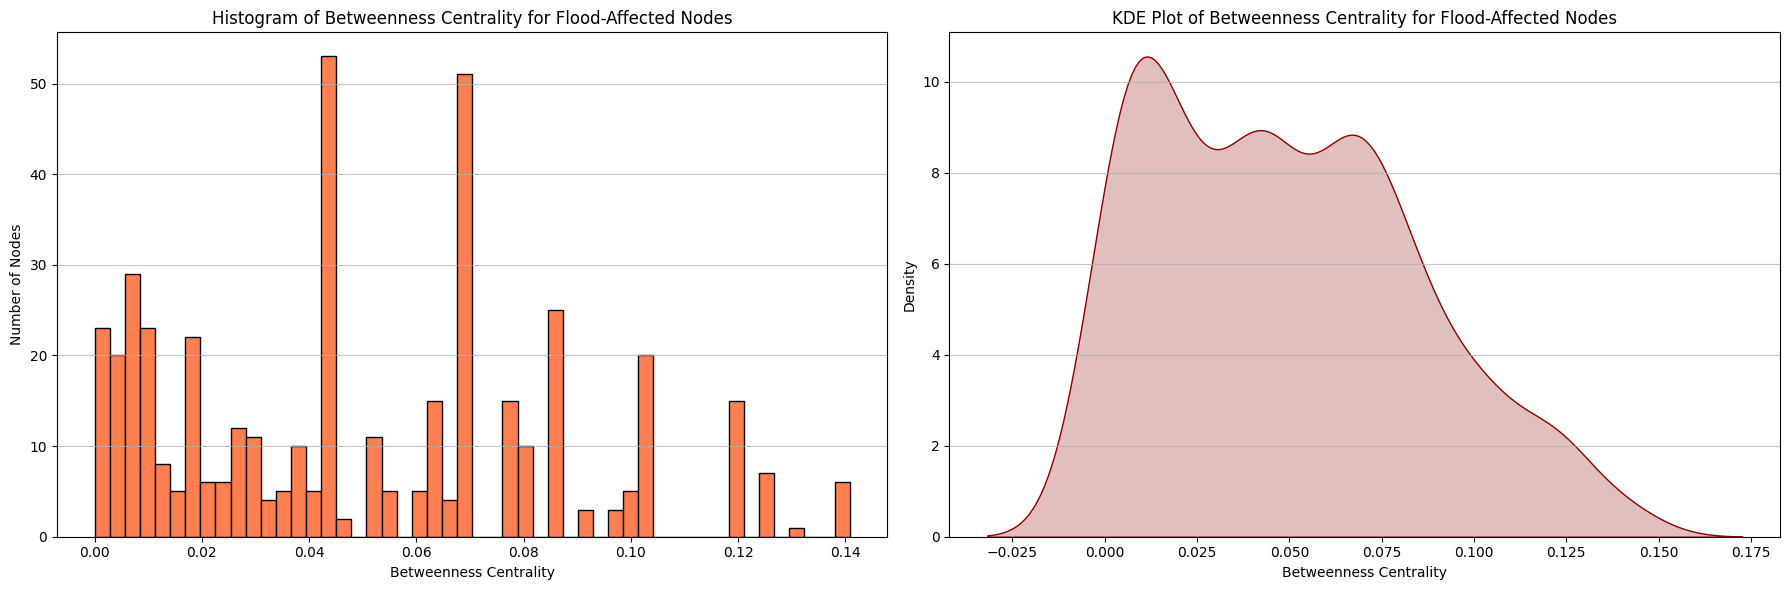

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract betweenness centrality values for flood-affected nodes
betweenness_flood_nodes = [betweenness_centrality[node] for node in flood_nodes_2000m_buffer if node in betweenness_centrality]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Histogram
axes[0].hist(betweenness_flood_nodes, bins=50, color='coral', edgecolor='black')
axes[0].set_title('Histogram of Betweenness Centrality for Flood-Affected Nodes')
axes[0].set_xlabel('Betweenness Centrality')
axes[0].set_ylabel('Number of Nodes')
axes[0].grid(axis='y', alpha=0.75)

# Plot KDE Plot
sns.kdeplot(betweenness_flood_nodes, fill=True, color='darkred', ax=axes[1])
axes[1].set_title('KDE Plot of Betweenness Centrality for Flood-Affected Nodes')
axes[1].set_xlabel('Betweenness Centrality')
axes[1].set_ylabel('Density')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

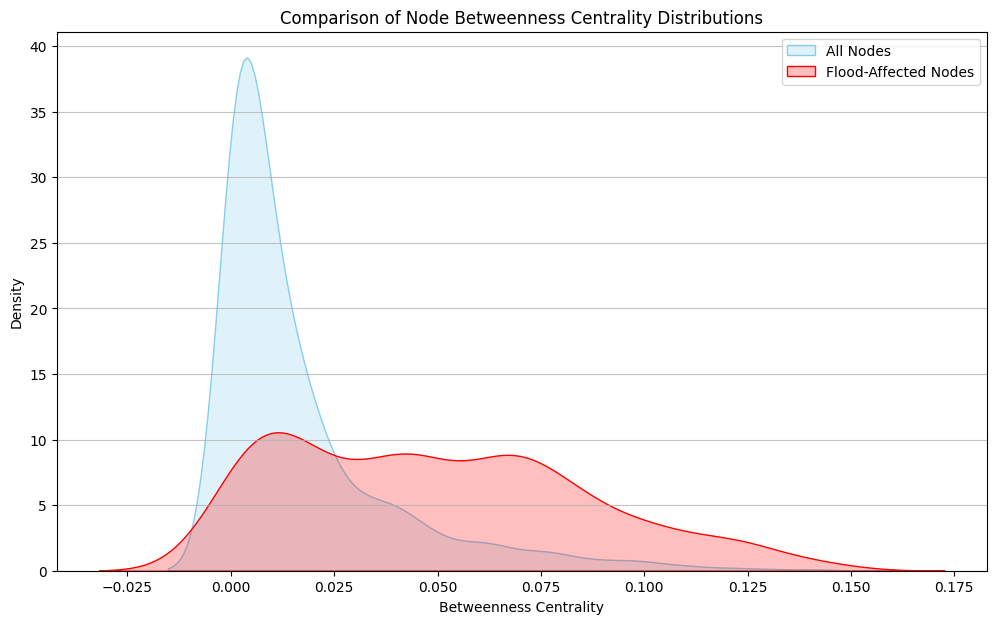

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 7))

sns.kdeplot(betweenness_values, fill=True, color='skyblue', label='All Nodes')
sns.kdeplot(betweenness_flood_nodes, fill=True, color='red', label='Flood-Affected Nodes')

plt.title('Comparison of Node Betweenness Centrality Distributions')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm

# FUNCTION: Compute global efficiency

def global_efficiency(G):
    """
    Calculates global efficiency of graph G based on
    Latora & Marchiori (2001)
    """
    N = len(G)
    if N <= 1:
        return 0

    path_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='length'))

    efficiency_sum = 0
    for u in path_lengths:
        for v in path_lengths[u]:
            if u != v:
                d = path_lengths[u][v]
                if d > 0:
                    efficiency_sum += 1 / d

    return efficiency_sum / (N * (N - 1))

In [ ]:
# COMPUTE ORIGINAL NETWORK EFFICIENCY

print("Calculating base network efficiency...")
E_original = global_efficiency(G_point)
print("Base Efficiency:", E_original)

Calculating base network efficiency...
Base Efficiency: 0.00043792565959189036


In [ ]:
# VULNERABILITY CALCULATION FOR FLOODED NODES

vulnerability_results = []

for node in tqdm(flood_nodes_2000m_buffer, desc="Processing nodes"):

    if node not in G_point:
        continue

    # Remove the node temporarily
    G_temp = G_point.copy()
    G_temp.remove_node(node)

    # Compute efficiency after removal
    E_removed = global_efficiency(G_temp)

    # Vulnerability
    if E_original > 0:
        V = (E_original - E_removed) / E_original
    else:
        V = np.nan

    vulnerability_results.append({
        "node": node,
        "efficiency_removed": E_removed,
        "vulnerability": V
    })

Processing nodes: 100%|██████████| 445/445 [1:26:37<00:00, 11.68s/it]


In [ ]:
# SAVE RESULTS TO DATAFRAME

df_vuln = pd.DataFrame(vulnerability_results)
df_vuln.sort_values(by="vulnerability", ascending=False, inplace=True)

df_vuln.head()

,node,efficiency_removed,vulnerability
415,457055028,0.000432,0.012811
414,457055028,0.000432,0.012811
409,457055028,0.000432,0.012811
408,457055028,0.000432,0.012811
410,457055028,0.000432,0.012811


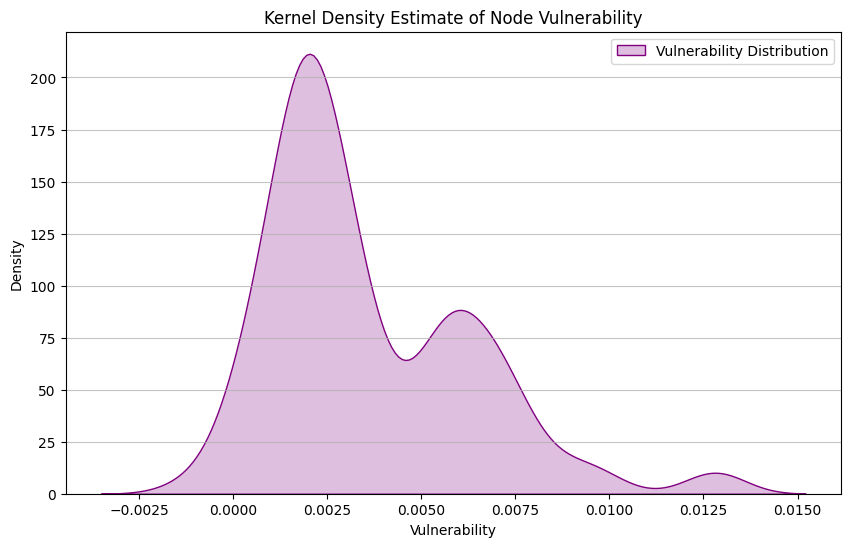

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn for kdeplot

# Ensure df_vuln exists and contains the vulnerability column
v = df_vuln["vulnerability"].dropna().values

plt.figure(figsize=(10, 6))

# KDE Plot of Vulnerability
sns.kdeplot(v, fill=True, color='purple', label='Vulnerability Distribution')
plt.title('Kernel Density Estimate of Node Vulnerability')
plt.xlabel('Vulnerability')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
import numpy as np

# Calculate the average betweenness centrality for all nodes
avg_betweenness_all_nodes = np.mean(betweenness_values)

# Calculate the average betweenness centrality for flood-affected nodes
avg_betweenness_flood_nodes = np.mean(betweenness_flood_nodes)

print(f"Average Betweenness Centrality (All Nodes): {avg_betweenness_all_nodes:.4f}")
print(f"Average Betweenness Centrality (Flood-Affected Nodes): {avg_betweenness_flood_nodes:.4f}")

Average Betweenness Centrality (All Nodes): 0.0169
Average Betweenness Centrality (Flood-Affected Nodes): 0.0495


In [ ]:
import geopandas as gpd

# Extract nodes and edges as GeoDataFrames from G_point if not already done
# nodes_p, edges_p = ox.graph_to_gdfs(G_point)
# This was already done in cell _JUvAg6w4HdR, so nodes_p is available

# Ensure nodes_p and buffer_gdf_2000m_4326 are in the same CRS
if nodes_p.crs != buffer_gdf_2000m_4326.crs:
    nodes_p_reprojected = nodes_p.to_crs(buffer_gdf_2000m_4326.crs)
else:
    nodes_p_reprojected = nodes_p

# Perform a spatial intersection to get nodes within the buffer
nodes_in_2000m_buffer = gpd.sjoin(nodes_p_reprojected, buffer_gdf_2000m_4326, how="inner", predicate='intersects')

print(f"Number of all nodes: {len(nodes_p)}")
print(f"Number of nodes within the 2000m buffer: {len(nodes_in_2000m_buffer)}")
print(nodes_in_2000m_buffer.head())

Number of all nodes: 1731
Number of nodes within the 2000m buffer: 1182
                  y          x  street_count  betweenness          highway  \
osmid                                                                        
597282   -23.551088 -46.626132             3     0.015045              NaN   
597283   -23.553327 -46.625264             4     0.044881  traffic_signals   
25870857 -23.559367 -46.613941             3     0.015372              NaN   
25871539 -23.556049 -46.622284             3     0.018407              NaN   
25871670 -23.552378 -46.625751             3     0.000709              NaN   

          ref                     geometry  index_right  
osmid                                                    
597282    NaN  POINT (-46.62613 -23.55109)            0  
597283    NaN  POINT (-46.62526 -23.55333)            0  
25870857  NaN  POINT (-46.61394 -23.55937)            0  
25871539  NaN  POINT (-46.62228 -23.55605)            0  
25871670  NaN  POINT (-46.62575 -

In [ ]:
import geopandas as gpd

# Convert the flood_nodes_2000m_buffer list to a set for efficient lookup
flood_nodes_set = set(flood_nodes_2000m_buffer)

# Filter nodes_in_2000m_buffer to exclude flood-affected nodes
# We need to ensure that the osmid in nodes_in_2000m_buffer is treated as a single value for lookup.
# The index of nodes_in_2000m_buffer is the osmid.
non_flood_nodes_in_2000m_buffer = nodes_in_2000m_buffer[~nodes_in_2000m_buffer.index.isin(flood_nodes_set)]

print(f"Number of nodes within the 2000m buffer (excluding flood-affected nodes): {len(non_flood_nodes_in_2000m_buffer)}")
print(non_flood_nodes_in_2000m_buffer.head())

Number of nodes within the 2000m buffer (excluding flood-affected nodes): 1062
                  y          x  street_count  betweenness          highway  \
osmid                                                                        
597282   -23.551088 -46.626132             3     0.015045              NaN   
597283   -23.553327 -46.625264             4     0.044881  traffic_signals   
25870857 -23.559367 -46.613941             3     0.015372              NaN   
25871539 -23.556049 -46.622284             3     0.018407              NaN   
25871670 -23.552378 -46.625751             3     0.000709              NaN   

          ref                     geometry  index_right  
osmid                                                    
597282    NaN  POINT (-46.62613 -23.55109)            0  
597283    NaN  POINT (-46.62526 -23.55333)            0  
25870857  NaN  POINT (-46.61394 -23.55937)            0  
25871539  NaN  POINT (-46.62228 -23.55605)            0  
25871670  NaN  POINT (-46.

In [ ]:
import random

# Get the OSM IDs (index) of the non-flood-affected nodes
non_flood_node_ids = non_flood_nodes_in_2000m_buffer.index.tolist()

# Randomly select 445 nodes from this list
# Ensure we don't try to select more nodes than available if the list is smaller than 445
num_nodes_to_select = min(445, len(non_flood_node_ids))
random_non_flood_nodes = random.sample(non_flood_node_ids, num_nodes_to_select)

print(f"Number of randomly selected non-flood nodes: {len(random_non_flood_nodes)}")
print(f"First 5 randomly selected non-flood nodes: {random_non_flood_nodes[:5]}")

Number of randomly selected non-flood nodes: 445
First 5 randomly selected non-flood nodes: [11372488912, 60685978, 2723898513, 4509498152, 461875263]


In [ ]:
betweenness_random_non_flood_nodes = [betweenness_centrality[node] for node in random_non_flood_nodes if node in betweenness_centrality]

print(f"Number of betweenness centrality values extracted for random non-flood nodes: {len(betweenness_random_non_flood_nodes)}")
print(f"First 5 betweenness centrality values for random non-flood nodes: {betweenness_random_non_flood_nodes[:5]}")

Number of betweenness centrality values extracted for random non-flood nodes: 445
First 5 betweenness centrality values for random non-flood nodes: [0.023514210158566716, 0.038666809308732036, 0.010497898815513662, 0.021025886191690876, 0.0016441726815928216]


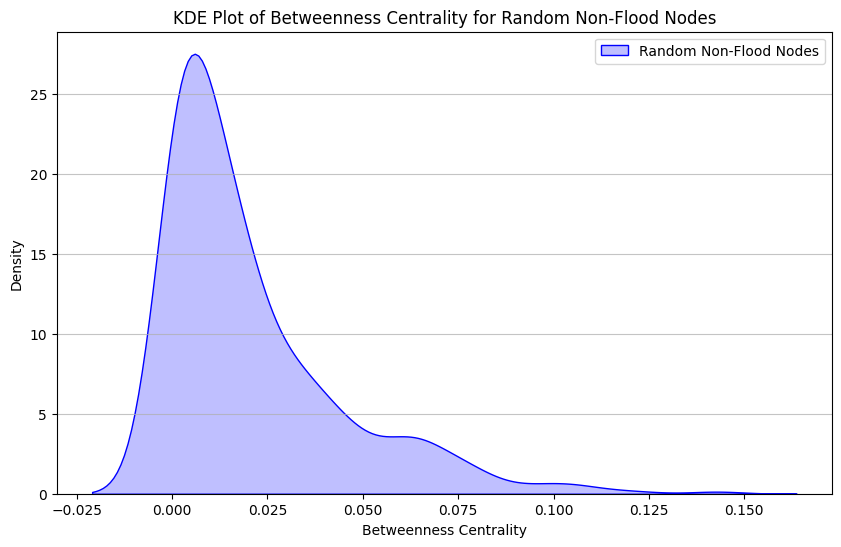

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(betweenness_random_non_flood_nodes, fill=True, color='blue', label='Random Non-Flood Nodes')
plt.title('KDE Plot of Betweenness Centrality for Random Non-Flood Nodes')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

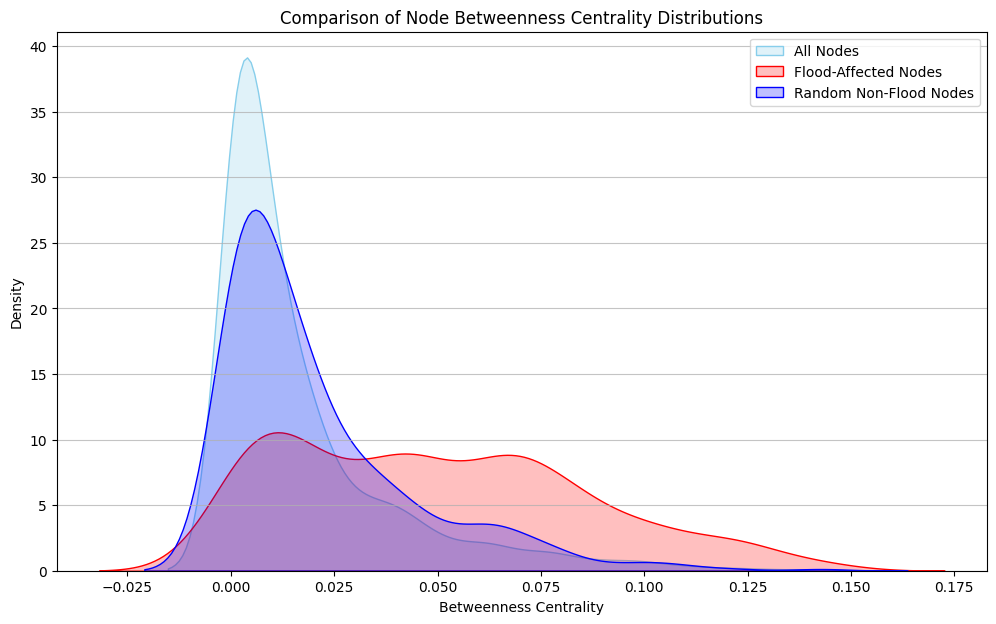

In [ ]:
plt.figure(figsize=(12, 7))

sns.kdeplot(betweenness_values, fill=True, color='skyblue', label='All Nodes')
sns.kdeplot(betweenness_flood_nodes, fill=True, color='red', label='Flood-Affected Nodes')
sns.kdeplot(betweenness_random_non_flood_nodes, fill=True, color='blue', label='Random Non-Flood Nodes')

plt.title('Comparison of Node Betweenness Centrality Distributions')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
import numpy as np
import networkx as nx
from tqdm import tqdm

# Initialize an empty list to store vulnerability results for random non-flood nodes
random_vulnerability_results = []

# Iterate through each node in the random_non_flood_nodes list
for node in tqdm(random_non_flood_nodes, desc="Calculating vulnerability for random non-flood nodes"):

    # Ensure the node exists in the original graph G_point
    if node not in G_point:
        continue

    # Create a temporary copy of the graph
    G_temp = G_point.copy()

    # Remove the current node from this temporary graph copy
    G_temp.remove_node(node)

    # Calculate the global efficiency of the modified graph
    E_removed = global_efficiency(G_temp)

    # Calculate the vulnerability V
    if E_original > 0:
        V = (E_original - E_removed) / E_original
    else:
        V = np.nan # Handle division by zero if E_original is zero

    # Append a dictionary containing the 'node' ID, 'efficiency_removed', and 'vulnerability' to the results list
    random_vulnerability_results.append({
        "node": node,
        "efficiency_removed": E_removed,
        "vulnerability": V
    })

print(f"Calculated vulnerability for {len(random_vulnerability_results)} random non-flood nodes.")

Calculating vulnerability for random non-flood nodes: 100%|██████████| 445/445 [1:28:15<00:00, 11.90s/it]

Calculated vulnerability for 445 random non-flood nodes.


In [ ]:
import pandas as pd

# SAVE RESULTS TO DATAFRAME
df_vuln_random = pd.DataFrame(random_vulnerability_results)
df_vuln_random.sort_values(by="vulnerability", ascending=False, inplace=True)

print("DataFrame for random non-flood node vulnerability created.")
df_vuln_random.head()

DataFrame for random non-flood node vulnerability created.


,node,efficiency_removed,vulnerability
94,458787982,0.000428,0.023545
444,5639817292,0.000430,0.018137
19,3701154929,0.000431,0.016767
334,434003360,0.000431,0.015999
413,445043283,0.000432,0.013828


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract vulnerability values for flood-affected nodes
vulnerability_flood_nodes = df_vuln["vulnerability"].dropna().values

# Extract vulnerability values for random non-flood nodes
vulnerability_random_non_flood_nodes = df_vuln_random["vulnerability"].dropna().values

print(f"Number of vulnerability values for flood-affected nodes: {len(vulnerability_flood_nodes)}")
print(f"Number of vulnerability values for random non-flood nodes: {len(vulnerability_random_non_flood_nodes)}")

Number of vulnerability values for flood-affected nodes: 445
Number of vulnerability values for random non-flood nodes: 445


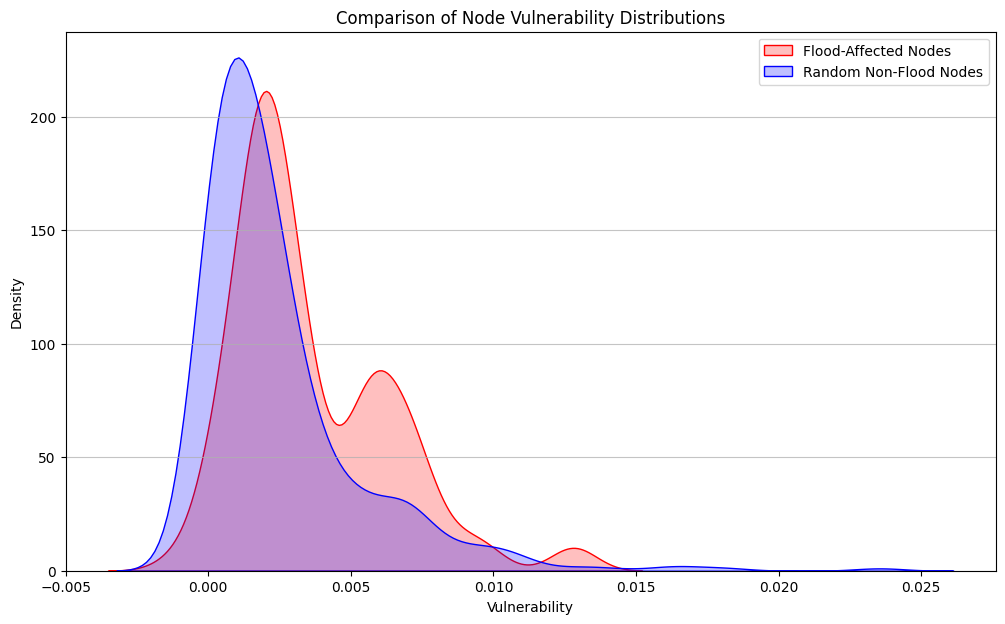

In [ ]:
plt.figure(figsize=(12, 7))

sns.kdeplot(vulnerability_flood_nodes, fill=True, color='red', label='Flood-Affected Nodes')
sns.kdeplot(vulnerability_random_non_flood_nodes, fill=True, color='blue', label='Random Non-Flood Nodes')

plt.title('Comparison of Node Vulnerability Distributions')
plt.xlabel('Vulnerability')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

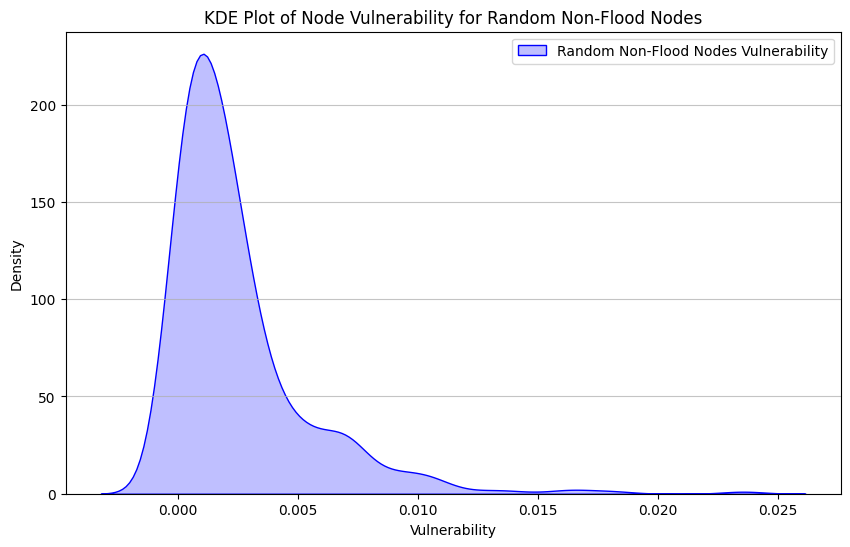

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(vulnerability_random_non_flood_nodes, fill=True, color='blue', label='Random Non-Flood Nodes Vulnerability')
plt.title('KDE Plot of Node Vulnerability for Random Non-Flood Nodes')
plt.xlabel('Vulnerability')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Spearman correlation for flood-affected nodes: 0.7206527829625927
Spearman p-value for flood-affected nodes: 1.765609583284696e-72
Spearman correlation for non-flood nodes: 0.7274773825273315
Spearman p-value for non-flood nodes: 1.7551524164132231e-74


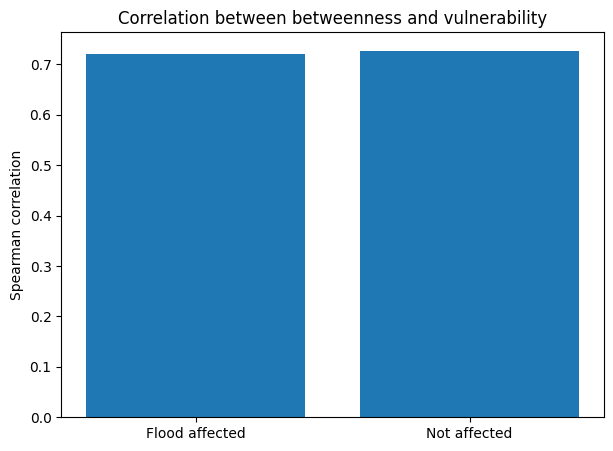

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Create df_flood by adding betweenness centrality to df_vuln
df_flood = df_vuln.copy()
df_flood['betweenness'] = df_flood['node'].map(betweenness_centrality)

# Create df_nonflood by adding betweenness centrality to df_vuln_random
df_nonflood = df_vuln_random.copy()
df_nonflood['betweenness'] = df_nonflood['node'].map(betweenness_centrality)


# Spearman correlations

corr_flood, p_flood = spearmanr(
    df_flood["betweenness"],
    df_flood["vulnerability"],
    nan_policy="omit"
)

corr_nonflood, p_nonflood = spearmanr(
    df_nonflood["betweenness"],
    df_nonflood["vulnerability"],
    nan_policy="omit"
)

print("Spearman correlation for flood-affected nodes:", corr_flood)
print("Spearman p-value for flood-affected nodes:", p_flood)
print("Spearman correlation for non-flood nodes:", corr_nonflood)
print("Spearman p-value for non-flood nodes:", p_nonflood)


# Bar chart for correlation comparison
groups = ["Flood affected", "Not affected"]
corr_values = [corr_flood, corr_nonflood]

plt.figure(figsize=(7,5))
plt.bar(groups, corr_values)
plt.ylabel("Spearman correlation")
plt.title("Correlation between betweenness and vulnerability")
plt.show()

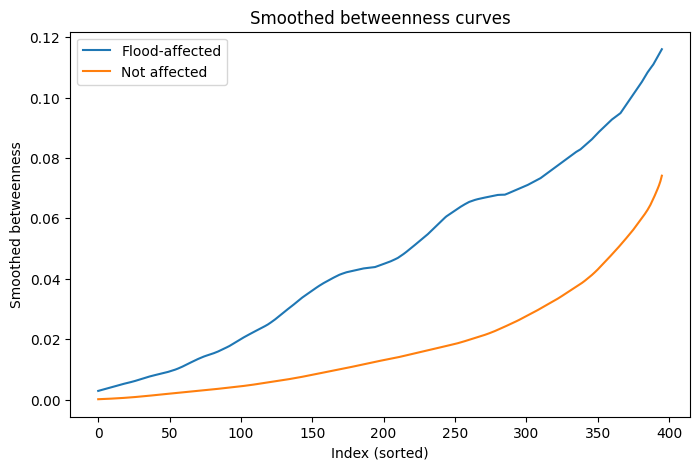

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort values
f_sorted = np.sort(betweenness_flood_nodes)
n_sorted = np.sort(betweenness_random_non_flood_nodes)

# Simple smoothing
window = 50
f_sm = np.convolve(f_sorted, np.ones(window)/window, mode="valid")
n_sm = np.convolve(n_sorted, np.ones(window)/window, mode="valid")

plt.figure(figsize=(8,5))
plt.plot(f_sm, label="Flood-affected")
plt.plot(n_sm, label="Not affected")
plt.xlabel("Index (sorted)")
plt.ylabel("Smoothed betweenness")
plt.title("Smoothed betweenness curves")
plt.legend()
plt.show()

In [ ]:
print("\n--- Top 10 Most Vulnerable Flood-Affected Nodes ---")
display(df_vuln.head(10))

print("\n--- Top 10 Most Vulnerable Random Non-Flood Nodes ---")
display(df_vuln_random.head(10))


--- Top 10 Most Vulnerable Flood-Affected Nodes ---


,node,efficiency_removed,vulnerability
415,457055028,0.000432,0.012811
414,457055028,0.000432,0.012811
409,457055028,0.000432,0.012811
408,457055028,0.000432,0.012811
410,457055028,0.000432,0.012811
411,457055028,0.000432,0.012811
413,457055028,0.000432,0.012811
412,457055028,0.000432,0.012811
340,457055028,0.000432,0.012811
319,155430748,0.000434,0.010101



--- Top 10 Most Vulnerable Random Non-Flood Nodes ---


,node,efficiency_removed,vulnerability
94,458787982,0.000428,0.023545
444,5639817292,0.000430,0.018137
19,3701154929,0.000431,0.016767
334,434003360,0.000431,0.015999
413,445043283,0.000432,0.013828
384,130010440,0.000432,0.012773
219,2578184873,0.000433,0.011248
72,1418201594,0.000433,0.010889
138,247949665,0.000433,0.010802
166,661211979,0.000433,0.010318


In [ ]:
import pandas as pd
from google.colab import files

with pd.ExcelWriter("multi_tables.xlsx") as writer:
    df_flood.to_excel(writer, sheet_name='flood_nodes_metrics', index=False)
    df_nonflood.to_excel(writer, sheet_name='non_flood_nodes_metrics', index=False)

files.download("multi_tables.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
top_percent = 0.1 # Top 10%

# Add 'betweenness' column to df_vuln if not already present
if 'betweenness' not in df_vuln.columns:
    df_vuln['betweenness'] = df_vuln['node'].map(betweenness_centrality)

# Add 'betweenness' column to df_vuln_random if not already present
if 'betweenness' not in df_vuln_random.columns:
    df_vuln_random['betweenness'] = df_vuln_random['node'].map(betweenness_centrality)

# For flood-affected nodes
num_top_flood = int(len(df_vuln) * top_percent)
top_vuln_flood = df_vuln.head(num_top_flood)
avg_betweenness_top_vuln_flood = top_vuln_flood['betweenness'].mean()
avg_vulnerability_top_vuln_flood = top_vuln_flood['vulnerability'].mean()

# For random non-flood nodes
num_top_nonflood = int(len(df_vuln_random) * top_percent)
top_vuln_nonflood = df_vuln_random.head(num_top_nonflood)
avg_betweenness_top_vuln_nonflood = top_vuln_nonflood['betweenness'].mean()
avg_vulnerability_top_vuln_nonflood = top_vuln_nonflood['vulnerability'].mean()

print(f"\nAverage Betweenness Centrality (Top {int(top_percent*100)}% Vulnerable Flood Nodes): {avg_betweenness_top_vuln_flood:.4f}")
print(f"Average Vulnerability (Top {int(top_percent*100)}% Vulnerable Flood Nodes): {avg_vulnerability_top_vuln_flood:.4f}")

print(f"\nAverage Betweenness Centrality (Top {int(top_percent*100)}% Vulnerable Random Non-Flood Nodes): {avg_betweenness_top_vuln_nonflood:.4f}")
print(f"Average Vulnerability (Top {int(top_percent*100)}% Vulnerable Random Non-Flood Nodes): {avg_vulnerability_top_vuln_nonflood:.4f}")


Average Betweenness Centrality (Top 10% Vulnerable Flood Nodes): 0.0906
Average Vulnerability (Top 10% Vulnerable Flood Nodes): 0.0091

Average Betweenness Centrality (Top 10% Vulnerable Random Non-Flood Nodes): 0.0591
Average Vulnerability (Top 10% Vulnerable Random Non-Flood Nodes): 0.0094


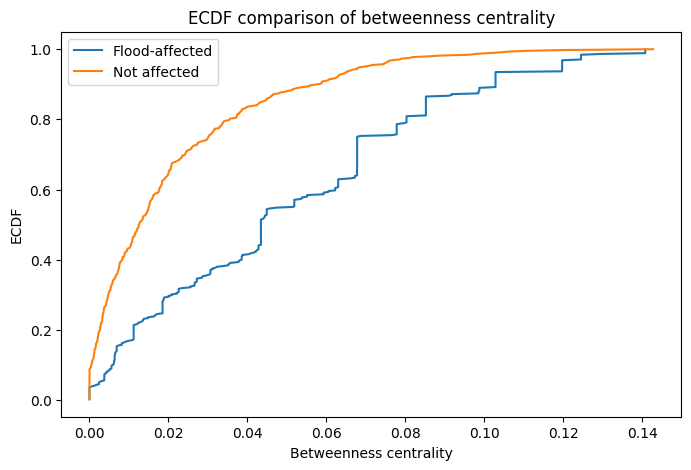

In [ ]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

xf, yf = ecdf(betweenness_flood_nodes)
xn, yn = ecdf(betweenness_random_non_flood_nodes)

plt.figure(figsize=(8,5))
plt.plot(xf, yf, label="Flood-affected")
plt.plot(xn, yn, label="Not affected")
plt.xlabel("Betweenness centrality")
plt.ylabel("ECDF")
plt.title("ECDF comparison of betweenness centrality")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import ks_2samp, mannwhitneyu

ks_stat, ks_p = ks_2samp(f_sorted, n_sorted)
mw_stat, mw_p = mannwhitneyu(f_sorted, n_sorted, alternative="two-sided")

print("Kolmogorov–Smirnov test:")
print("Statistic:", ks_stat)
print("p-value:", ks_p)

print("\nMann–Whitney U test:")
print("Statistic:", mw_stat)
print("p-value:", mw_p)


Kolmogorov–Smirnov test:
Statistic: 0.42696629213483145
p-value: 9.037430959732736e-37

Mann–Whitney U test:
Statistic: 148072.0
p-value: 1.7056737230802852e-37


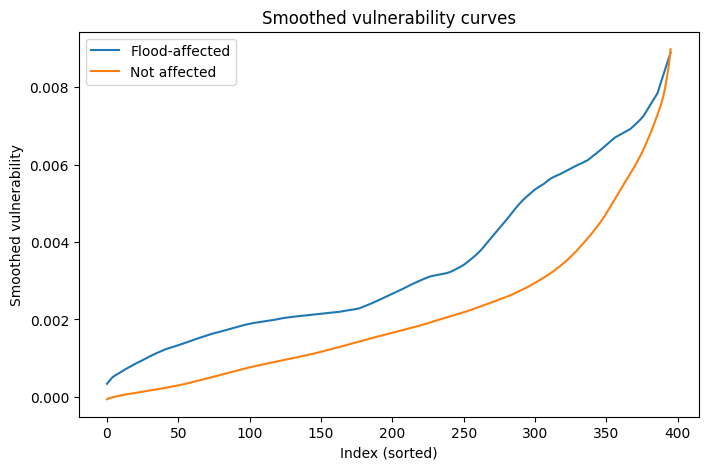

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vf_sorted = np.sort(vulnerability_flood_nodes)
vn_sorted = np.sort(vulnerability_random_non_flood_nodes)

window = 50  # adjust if needed
vf_sm = np.convolve(vf_sorted, np.ones(window)/window, mode="valid")
vn_sm = np.convolve(vn_sorted, np.ones(window)/window, mode="valid")

plt.figure(figsize=(8,5))
plt.plot(vf_sm, label="Flood-affected")
plt.plot(vn_sm, label="Not affected")
plt.xlabel("Index (sorted)")
plt.ylabel("Smoothed vulnerability")
plt.title("Smoothed vulnerability curves")
plt.legend()
plt.show()

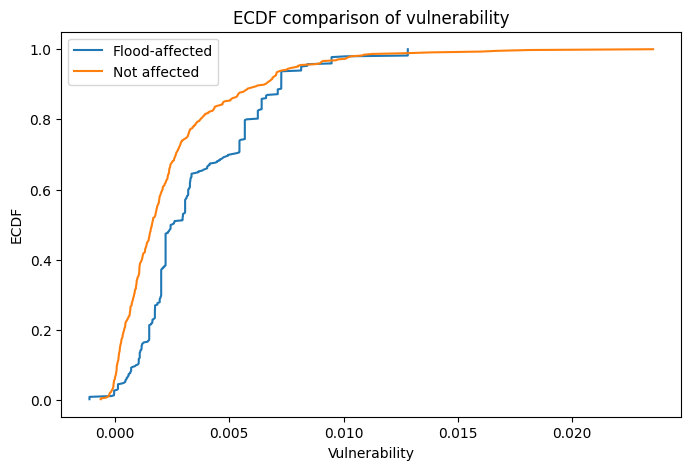

In [ ]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

xvf, yvf = ecdf(vulnerability_flood_nodes)
xvn, yvn = ecdf(vulnerability_random_non_flood_nodes)

plt.figure(figsize=(8,5))
plt.plot(xvf, yvf, label="Flood-affected")
plt.plot(xvn, yvn, label="Not affected")
plt.xlabel("Vulnerability")
plt.ylabel("ECDF")
plt.title("ECDF comparison of vulnerability")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import ks_2samp, mannwhitneyu

ks_stat_v, ks_p_v = ks_2samp(vulnerability_flood_nodes, vulnerability_random_non_flood_nodes)
mw_stat_v, mw_p_v = mannwhitneyu(vulnerability_flood_nodes, vulnerability_random_non_flood_nodes, alternative="two-sided")

print("Kolmogorov–Smirnov test (Vulnerability):")
print("Statistic:", ks_stat_v)
print("p-value:", ks_p_v)

print("\nMann–Whitney U test (Vulnerability):")
print("Statistic:", mw_stat_v)
print("p-value:", mw_p_v)


Kolmogorov–Smirnov test (Vulnerability):
Statistic: 0.30337078651685395
p-value: 1.7865990285768514e-18

Mann–Whitney U test (Vulnerability):
Statistic: 130991.0
p-value: 7.400264260244943e-17


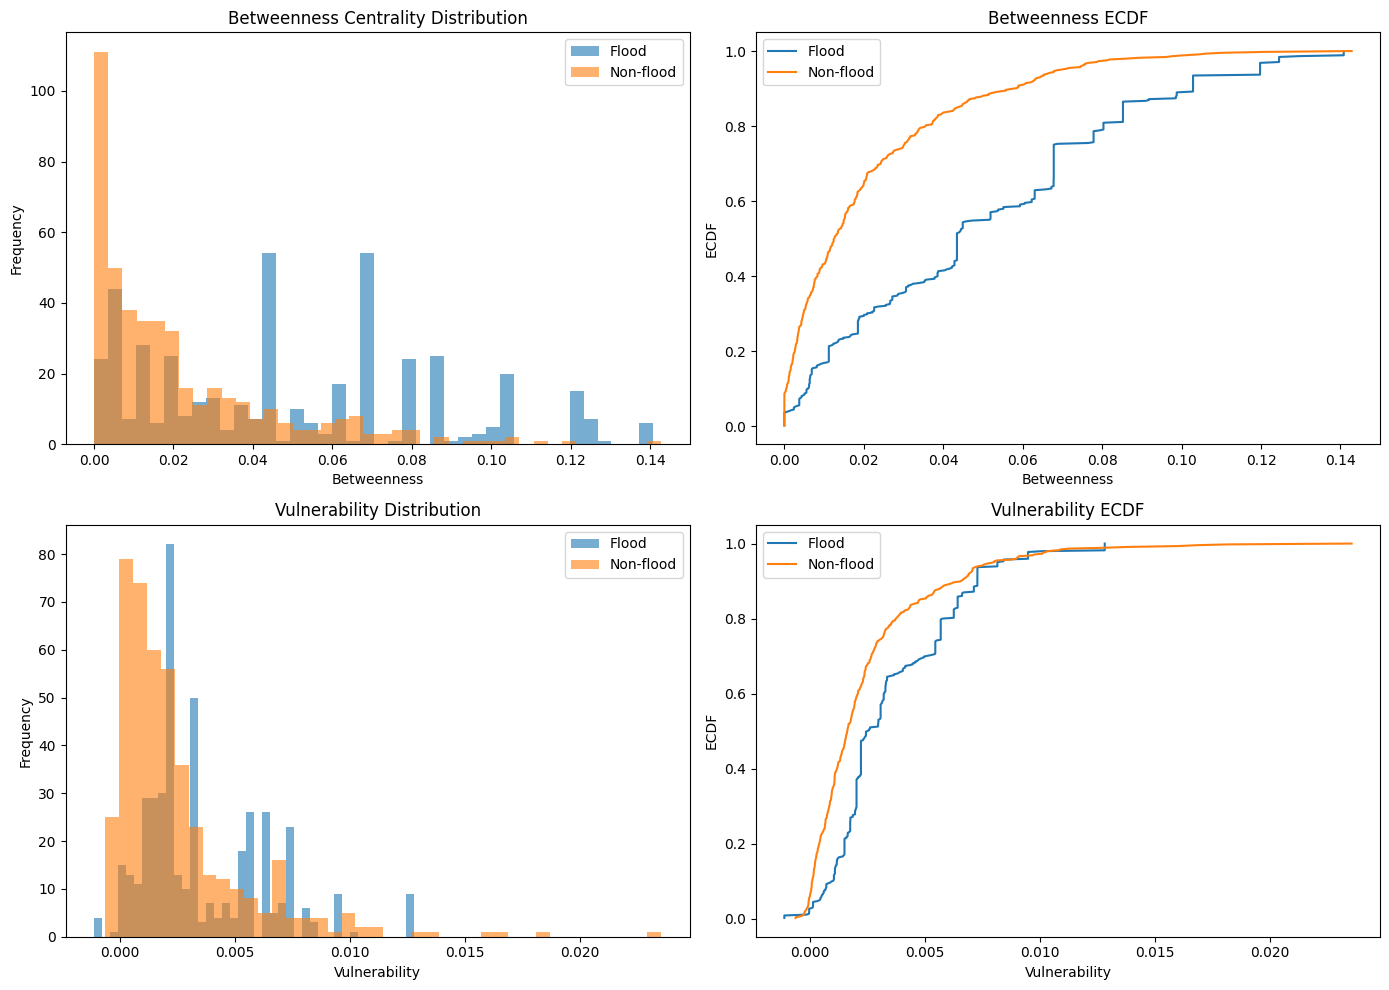

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# ECDF helper function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

# Define variables using existing data
f = betweenness_flood_nodes
n = betweenness_random_non_flood_nodes
vf = vulnerability_flood_nodes
vn = vulnerability_random_non_flood_nodes

# Prepare ECDF data
xf_b, yf_b = ecdf(f)
xn_b, yn_b = ecdf(n)
xf_v, yf_v = ecdf(vf)
xn_v, yn_v = ecdf(vn)


# Combined figure: BET + VUL side by side
fig, axes = plt.subplots(2, 2, figsize=(14,10))


# 1A. Betweenness histogram
axes[0,0].hist(f, bins=40, alpha=0.6, label="Flood")
axes[0,0].hist(n, bins=40, alpha=0.6, label="Non-flood")
axes[0,0].set_title("Betweenness Centrality Distribution")
axes[0,0].set_xlabel("Betweenness")
axes[0,0].set_ylabel("Frequency")
axes[0,0].legend()


# 1B. Betweenness ECDF
axes[0,1].plot(xf_b, yf_b, label="Flood")
axes[0,1].plot(xn_b, yn_b, label="Non-flood")
axes[0,1].set_title("Betweenness ECDF")
axes[0,1].set_xlabel("Betweenness")
axes[0,1].set_ylabel("ECDF")
axes[0,1].legend()


# 1C. Vulnerability histogram
axes[1,0].hist(vf, bins=40, alpha=0.6, label="Flood")
axes[1,0].hist(vn, bins=40, alpha=0.6, label="Non-flood")
axes[1,0].set_title("Vulnerability Distribution")
axes[1,0].set_xlabel("Vulnerability")
axes[1,0].set_ylabel("Frequency")
axes[1,0].legend()


# 1D. Vulnerability ECDF
axes[1,1].plot(xf_v, yf_v, label="Flood")
axes[1,1].plot(xn_v, yn_v, label="Non-flood")
axes[1,1].set_title("Vulnerability ECDF")
axes[1,1].set_xlabel("Vulnerability")
axes[1,1].set_ylabel("ECDF")
axes[1,1].legend()

plt.tight_layout()
plt.show()